In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2013-01-01'
end = '2023-12-31'

df = yf.download('AAPL', start, end)
df.head()


*********************100%***********************]  1 of 1 completed

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2013-01-02,16.687338,19.608213,19.821428,19.343929,19.779285,560518000
2013-01-03,16.476706,19.360714,19.631071,19.321428,19.567142,352965200
2013-01-04,16.017756,18.821428,19.236786,18.779642,19.177500,594333600
2013-01-07,15.923535,18.710714,18.903570,18.400000,18.642857,484156400
2013-01-08,15.966389,18.761070,18.996071,18.616072,18.900356,458707200


In [3]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-22,192.656189,193.600006,195.410004,192.970001,195.179993,37122800
2023-12-26,192.108841,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27,192.208359,193.149994,193.500000,191.089996,192.490005,48087700
2023-12-28,192.636261,193.580002,194.660004,193.169998,194.139999,34049900
2023-12-29,191.591385,192.529999,194.399994,191.729996,193.899994,42628800


In [4]:
df = df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2013-01-02,16.687338,19.608213,19.821428,19.343929,19.779285,560518000
1,2013-01-03,16.476706,19.360714,19.631071,19.321428,19.567142,352965200
2,2013-01-04,16.017756,18.821428,19.236786,18.779642,19.177500,594333600
3,2013-01-07,15.923535,18.710714,18.903570,18.400000,18.642857,484156400
4,2013-01-08,15.966389,18.761070,18.996071,18.616072,18.900356,458707200


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()


C:\Users\Vishal Dubey\AppData\Local\Temp\ipykernel_7948\135043109.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,19.608213,19.821428,19.343929,19.779285,560518000
1,19.360714,19.631071,19.321428,19.567142,352965200
2,18.821428,19.236786,18.779642,19.177500,594333600
3,18.710714,18.903570,18.400000,18.642857,484156400
4,18.761070,18.996071,18.616072,18.900356,458707200


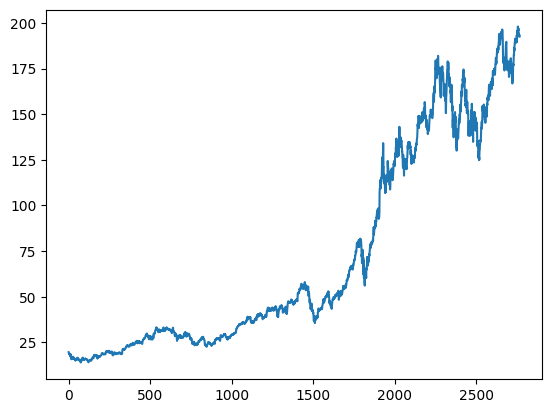

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,181.768301
2764,181.787101
2765,181.898701
2766,182.046001


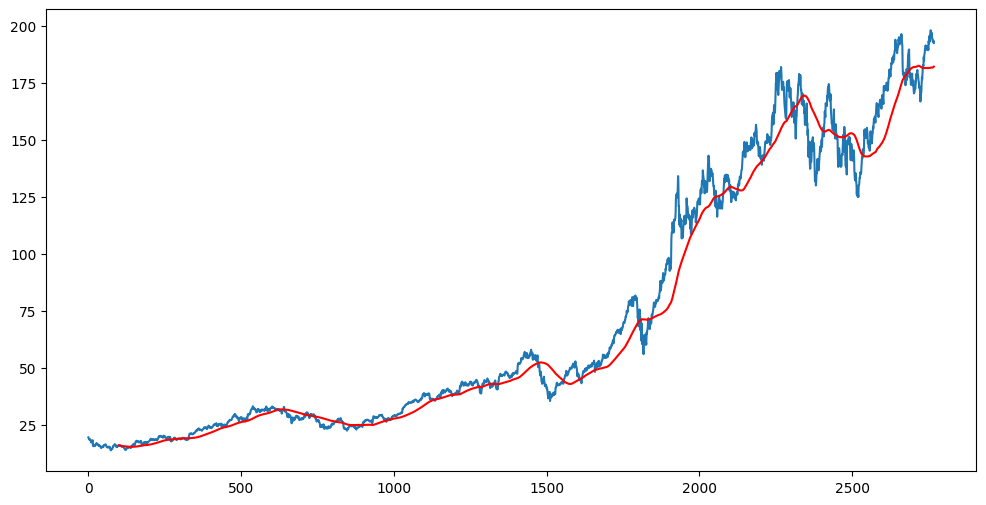

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,178.649100
2764,178.871851
2765,179.085250
2766,179.290201


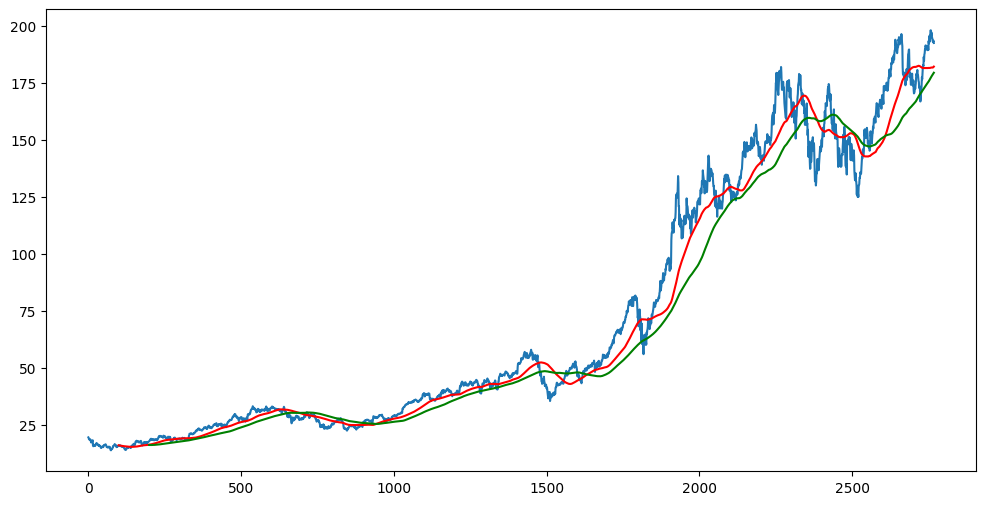

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(2768, 5)

In [12]:
# splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [13]:
data_training.head()

Ticker,AAPL
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [14]:
data_testing.head()

Ticker,AAPL
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.82234426],
       [0.85977174],
       [0.82791678]])

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# ML Model
from tensorflow.keras.layers import Dense, Dropout, LSTM 
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\Vishal Dubey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 296ms/step - loss: 0.0274
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 297ms/step - loss: 0.0033
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 293ms/step - loss: 0.0024
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 288ms/step - loss: 0.0035
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 284ms/step - loss: 0.0023
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 299ms/step - loss: 0.0025
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 289ms/step - loss: 0.0021
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 281ms/step - loss: 0.0021
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 321ms/step - loss: 0.0028
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - loss: 0.0018
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - loss: 0.0023
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 277ms/step - loss: 0.0019
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 282ms/step - loss: 0.0018
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 296ms/step - loss: 0.0020
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [22]:
model.save('my_model.keras')

In [23]:
data_testing.head()

Ticker,AAPL
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [24]:
past_100_days = data_training.tail(100)

In [30]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [31]:
final_df.head()

Ticker,AAPL
0,67.092499
1,69.025002
2,68.757500
3,70.742500
4,70.792503


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01474996],
       [0.01270823],
       [0.02785889],
       [0.02824054],
       [0.01948211],
       [0.03694166],
       [0.04852404],
       [0.03949856],
       [0.04730286],
       [0.05569867],
       [0.06155668],
       [0.06749097],
       [0.07968403],
       [0.08899577],
       [0.08212645],
       [0.07495182],
       [0.07855823],
       [0.0750663 ],
       [0.08890033],
       [0.08542756],
       [0.09704813],
       [0.09250675],
       [0.09639937],
       [0.09227778],
       [0.09491097],
       [0.09517813],
       [0.09458661],
       [0.10204746],
       [0.10489057],
       [0.10828706],
       [0.10294429],
       [0.12046101],
       [0.12420096],
       [0.14429369],
       [0.16118076],
       [0.12885683],
       [0.13439043],
       [0.14238555],
       [0.15973055],
       [0.15879558],
       [0.15906275],
       [0.15522736],
       [0.17268685],
       [0.18730323],
       [0.17495755],
       [0.18407846],
       [0.162

In [33]:
input_data.shape

(931, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [37]:
# Making Predictions

y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step


In [38]:
y_predicted.shape

(831, 1)

In [39]:
y_test

array([0.34275956, 0.36840499, 0.36977886, 0.34375177, 0.33008947,
       0.30337548, 0.32810504, 0.34130935, 0.30551265, 0.31390846,
       0.34489667, 0.36535195, 0.3587116 , 0.37183963, 0.37931957,
       0.35054475, 0.37710612, 0.35161337, 0.36626788, 0.3654283 ,
       0.38069343, 0.43740342, 0.41221592, 0.41290288, 0.40923922,
       0.39634016, 0.37313721, 0.38481503, 0.37993019, 0.37138169,
       0.36596257, 0.36603892, 0.37786936, 0.33665348, 0.36809968,
       0.3187933 , 0.31810634, 0.33085277, 0.36527561, 0.3964165 ,
       0.39382146, 0.37573225, 0.37306086, 0.39992748, 0.39779037,
       0.39817202, 0.4061099 , 0.39916423, 0.38878394, 0.39343981,
       0.38351745, 0.3568798 , 0.36695479, 0.3735188 , 0.37779302,
       0.39656919, 0.4245807 , 0.42732843, 0.42625987, 0.42099338,
       0.43244223, 0.43725073, 0.41740607, 0.42854961, 0.42221462,
       0.41740607, 0.46396472, 0.46343044, 0.47022342, 0.45465304,
       0.46663611, 0.49449505, 0.4874731 , 0.49518195, 0.53120

In [40]:
y_predicted

array([[0.43933958],
       [0.43012154],
       [0.4188605 ],
       [0.40673608],
       [0.39452058],
       [0.38261884],
       [0.3710994 ],
       [0.36019927],
       [0.35029408],
       [0.34140924],
       [0.3335595 ],
       [0.32699448],
       [0.3221299 ],
       [0.31927675],
       [0.3186764 ],
       [0.32036594],
       [0.32374114],
       [0.32839653],
       [0.33354783],
       [0.33869678],
       [0.34350735],
       [0.34799716],
       [0.35290772],
       [0.3585723 ],
       [0.36499   ],
       [0.37184638],
       [0.37850517],
       [0.38404202],
       [0.38799363],
       [0.39018744],
       [0.39059117],
       [0.38929805],
       [0.38657606],
       [0.38298815],
       [0.37856716],
       [0.37373376],
       [0.36837244],
       [0.3624372 ],
       [0.35613754],
       [0.3501047 ],
       [0.3452606 ],
       [0.34238282],
       [0.34163085],
       [0.3427353 ],
       [0.34556663],
       [0.34988552],
       [0.35531247],
       [0.361

In [41]:
scaler.scale_

array([0.00763257])

In [42]:
scale_factor = 1/0.00763257
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

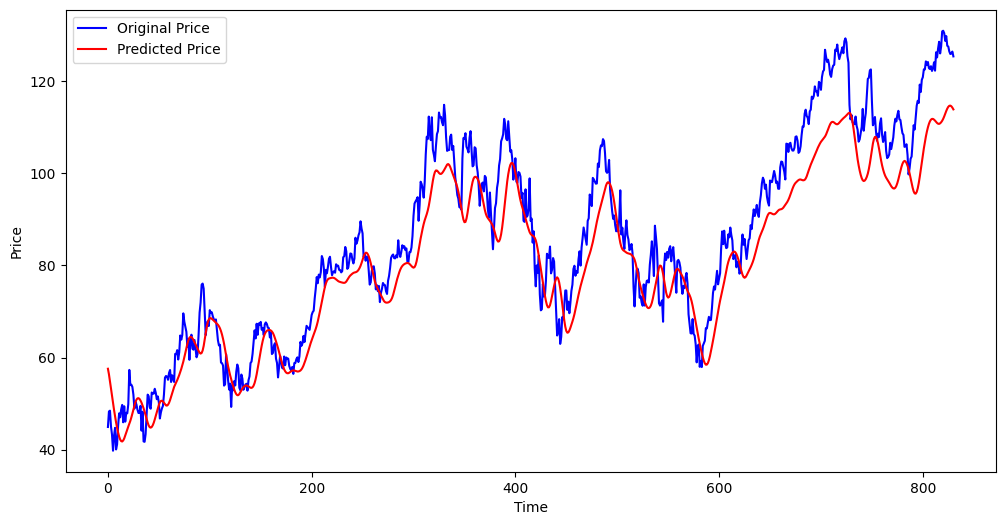

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()